In [51]:
import pandas as pd
from privacypacking.utils.utils import LOGS_PATH
from privacypacking.utils.analysis import load_ray_experiment
import plotly.express as px

In [52]:
logs = LOGS_PATH.joinpath("ray/run_and_report_2021-08-18_12-01-17")
df = load_ray_experiment(logs)

In [53]:
df["n_blocks"] = df.apply(lambda row: row["config"]["blocks_spec"]["initial_num"], axis=1) 

In [54]:
for curve in ["gaussian", "laplace", "SubsampledGaussian"]:
    df[f"n_{curve}"] = df.apply(lambda row: row["config"]["tasks_spec"]["curve_distributions"][curve]["initial_num"], axis=1) 

In [55]:
df

,scheduler,n_allocated_tasks,realized_profit,n_tasks,maximum_profit,scheduling_time,time_this_iter_s,done,timesteps_total,episodes_total,...,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id,n_blocks,n_gaussian,n_laplace,n_SubsampledGaussian
0,FlatRelevance,152,152,200,200,0.121070,0.606706,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",0.606706,0,1,855c3_00146,5,100,0,100
1,simplex,112,112,185,185,0.964667,1.377501,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",1.377501,0,1,855c3_00454,5,50,85,50
2,OverflowRelevance,159,159,200,200,0.080854,0.439616,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",0.439616,0,1,855c3_00628,5,0,100,100
3,OfflineDPF,35,35,50,50,0.012830,0.058173,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",0.058173,0,1,855c3_00201,10,0,50,0
4,simplex,244,244,360,360,1.721768,2.680891,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",2.680891,0,1,855c3_00558,5,100,85,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FlatRelevance,134,134,200,200,0.122161,0.722343,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",0.722343,0,1,855c3_00266,5,50,50,100
996,OverflowRelevance,143,143,220,220,0.079017,0.551821,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",0.551821,0,1,855c3_00301,10,85,50,85
997,OfflineDPF,187,187,360,360,0.211316,1.684512,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",1.684512,0,1,855c3_00713,10,85,100,175
998,simplex,152,152,235,235,1.118631,1.753682,False,None,None,...,128.59.19.233,"{'epsilon': 10, 'delta': 0.001, 'global_seed':...",1.753682,0,1,855c3_00343,10,100,50,85


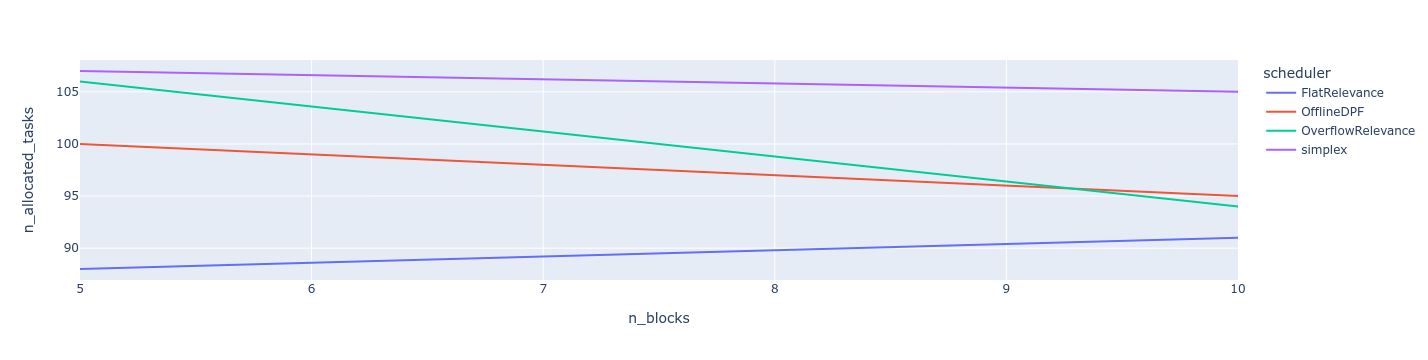

In [56]:
px.line(df.query("n_laplace == 50 and n_gaussian == 50 and n_SubsampledGaussian == 50").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

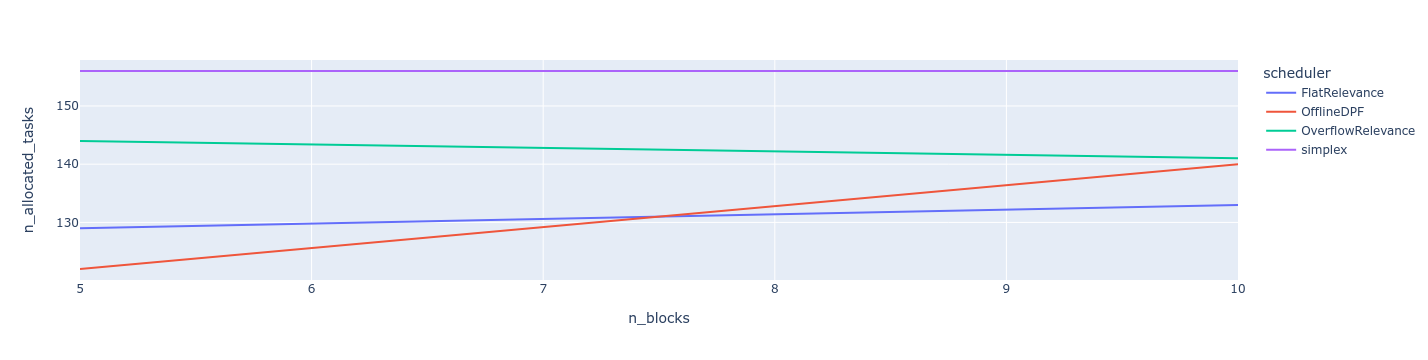

In [57]:
px.line(df.query("n_laplace == 85 and n_gaussian == 85 and n_SubsampledGaussian == 85").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

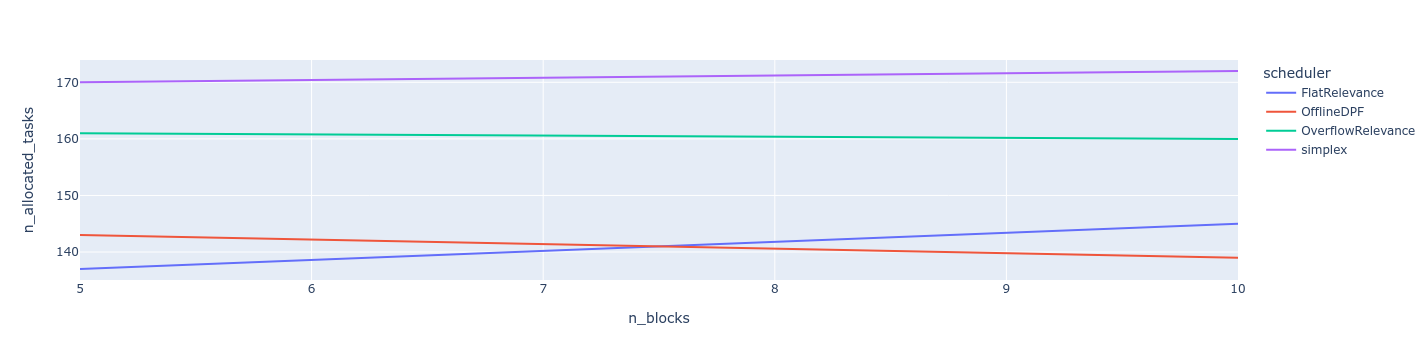

In [58]:
px.line(df.query("n_laplace == 100 and n_gaussian == 100 and n_SubsampledGaussian == 100").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

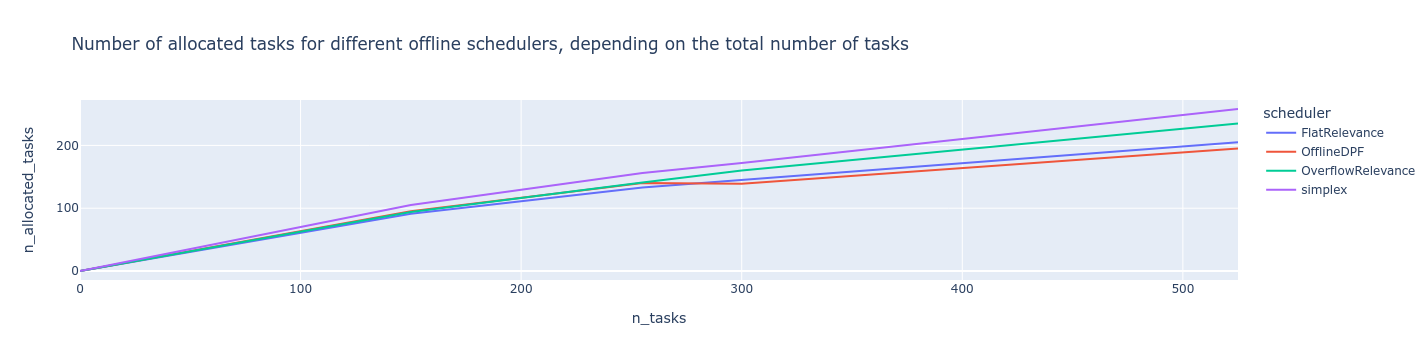

In [60]:
px.line(df.query("n_laplace == n_gaussian and n_laplace == n_SubsampledGaussian and n_blocks == 10").sort_values(["n_tasks", "scheduler"]), x="n_tasks", y="n_allocated_tasks", color="scheduler",
        title="Number of allocated tasks for different offline schedulers, depending on the total number of tasks"
       
       )

## Setup
- Offline: all the tasks and blocks are known in advance
- 10 blocks 
- 1/3 of the tasks are Laplace, 1/3 Gaussian, 1/3 Subsampled Gaussian
- Each task has a different noise (e.g. sigma sampled between 1 and 5)
- Each task has profit = 1 (to be fair to DPF which doesn't handle profit)

## Schedulers

- Simplex solves the ILP to find the optimal allocation
- OfflineDPF orders the tasks by dominant share and schedules them in order
- FlatRelevance and OverflowRelevance use coefficients to weight the RDP orders. See the heuristics notes:

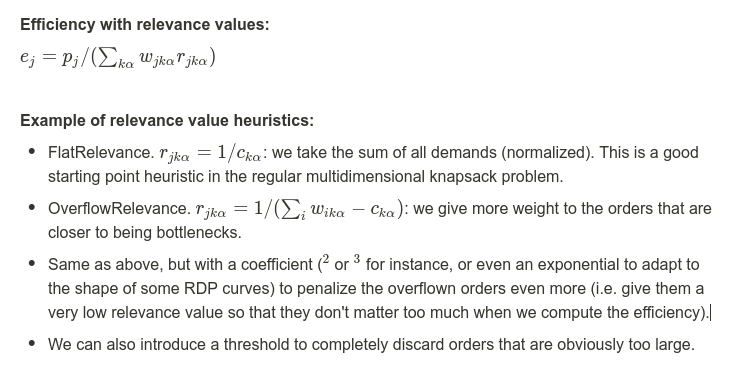


